In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getuser

# Get the current user's name
user = getuser()

# Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\dream-team-fpl-prediction\data\ds_gk.xlsx'

# Read the dataset
df = pd.read_excel(data_path)

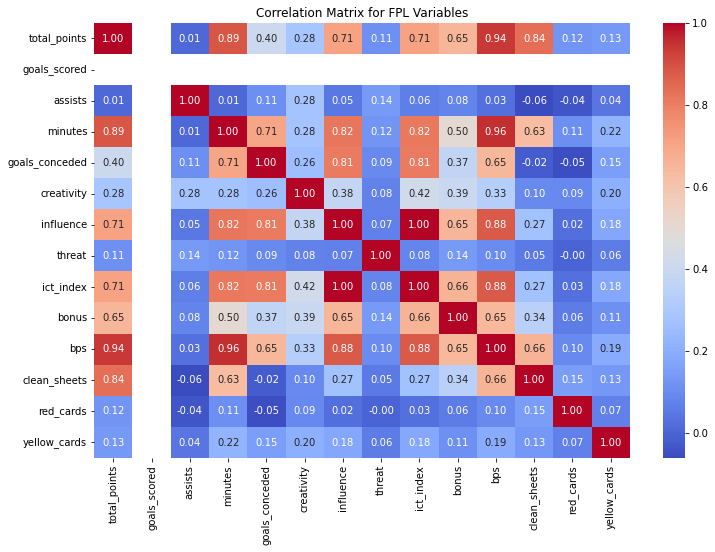

In [10]:
# Define the list of FPL variables
fpl_variables = [
    'goals_scored', 'assists', 'minutes', 'goals_conceded', 
    'creativity', 'influence', 'threat', 'ict_index', 
    'bonus', 'bps', 'clean_sheets', 'red_cards', 'yellow_cards'
]

# Add 'total_points' to the list for correlation analysis
fpl_variables_with_points = ['total_points'] + fpl_variables

# Correlation matrix for the selected variables
plt.figure(figsize=(12, 8))
corr_matrix = df[fpl_variables_with_points].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for FPL Variables')
plt.show()
